# Filter design using `empymod` or own transform pairs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## 1. Use `empymod` instead of theoretical transform pair

### Define model

Here we create a model with 1000 m water layer below air and above a halfspace of 1 Ohm.m.

`empymod.fdesign.empy_hankel` takes more optional parameters for `empymod.dipole`, such as `aniso`, `epermH`, `epermV`, `mpermH`, `mpermV `, and `htarg`. See the documentation of `empymod.fdesign.empy_hankel` for more information.

In [3]:
model = {
    'zsrc': 950,
    'zrec': 1000,
    'depth': [0, 1000],
    'res': [2e14, 0.3, 1],
    'freqtime': 1,
}

### Use the defined `empymod`-model

   brute fct calls : 100    

   Filter length   : 201
   Best filter
   > Min field     : 7.52344e-28
   > Spacing       : 0.1
   > Shift         : -1.888888889
   > Base min/max  : 6.866274e-06 / 3.331277e+03

:: empymod END; runtime = 0:00:47.106850 :: 

* QC: Overview of brute-force inversion:


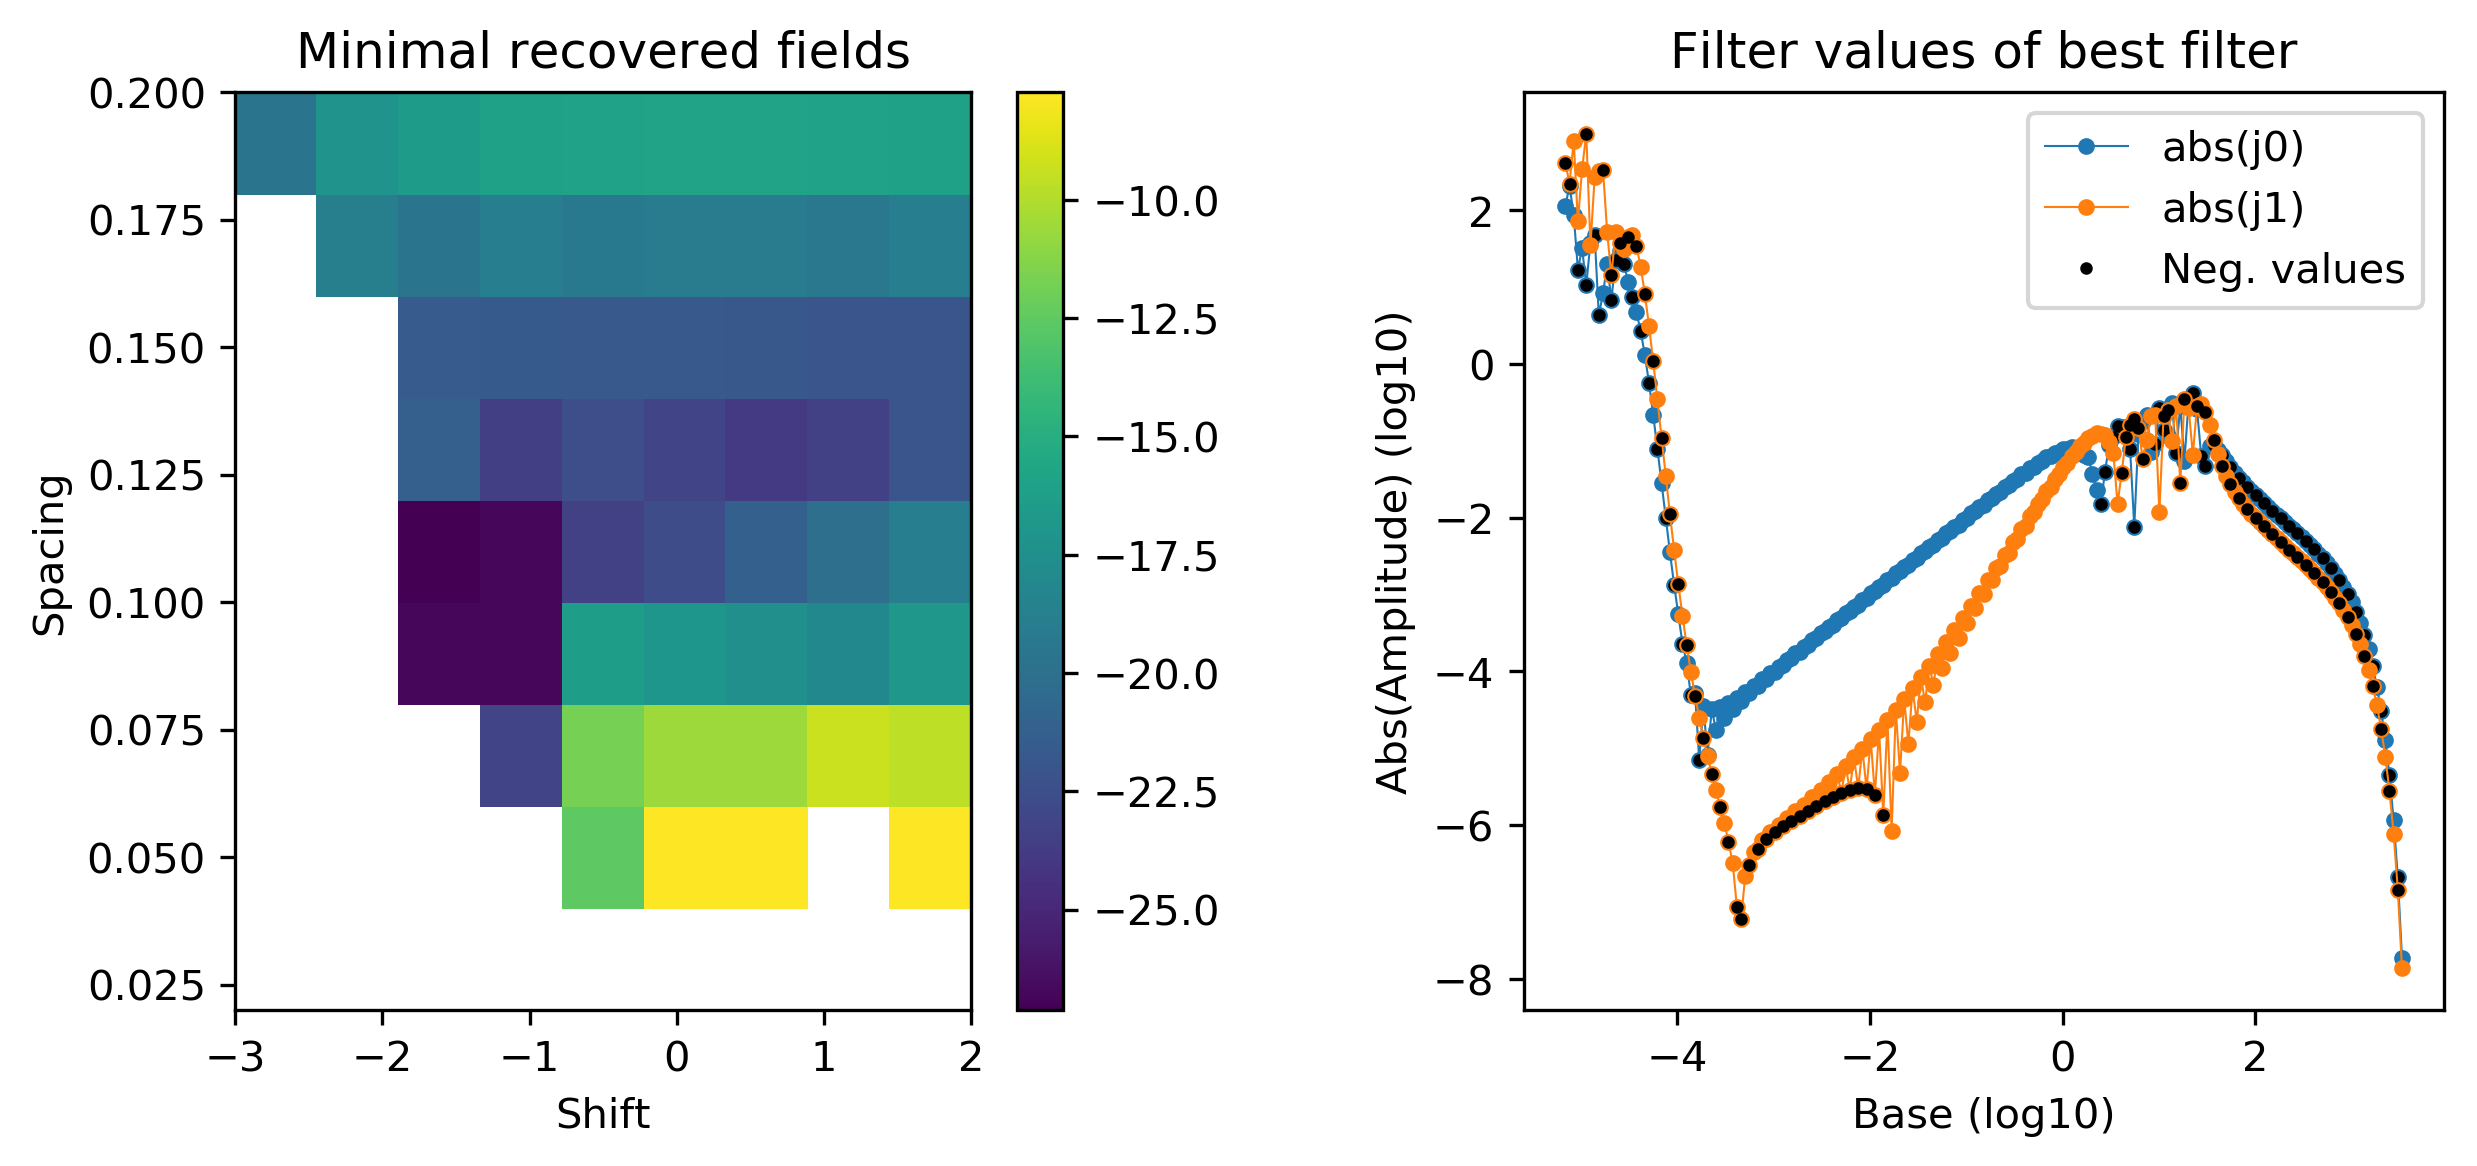

In [4]:
inp = {'spacing': (0.02, 0.2, 10),
       'shift': (-3, 2, 10),
       'r': np.logspace(1, 10, 1000),
       'r_def': (1, 1, 2),
       'full_output': True,
       'error': 0.01,
       'verb': 2,
       'plot': 1,
       'save': False,
       'fI': (epm.fdesign.j0_1(5), epm.fdesign.j1_1(5)),  # Theoretical tp for inversion (much faster)
       'fC': epm.fdesign.empy_hankel('j2', **model)}      # empymod for testing the goodness of the filter
filt, out = epm.fdesign.design(n=201, name='test-empy', **inp)

## 2. Provide own theoretical transform pair instead of inbuilt once

### Define transform pair

Defining an own transform pair is straight forward. The only thing you have to assure that the first string that goes into `epm.fdesign.Ghosh` is one of `j0`, `j1`, `sin`, or `cos`, so that `fdesign` knows which transform it is.

In [5]:
def my_tp_pair(var):
    '''My transform pair.'''

    def lhs(l):
        return l*np.exp(-var*l**2)

    def rhs(r):
        return np.exp(-r**2/(4*var))/(2*var)

    return epm.fdesign.Ghosh('j0', lhs, rhs)

### Use the own defined transform pair

   brute fct calls : 2500                                   

   Filter length   : 101
   Best filter
   > Max r         : 8.93205
   > Spacing       : 0.1
   > Shift         : -0.8571428571
   > Base min/max  : 2.859402e-03 / 6.298251e+01

:: empymod END; runtime = 0:00:12.893343 :: 

* QC: Overview of brute-force inversion:


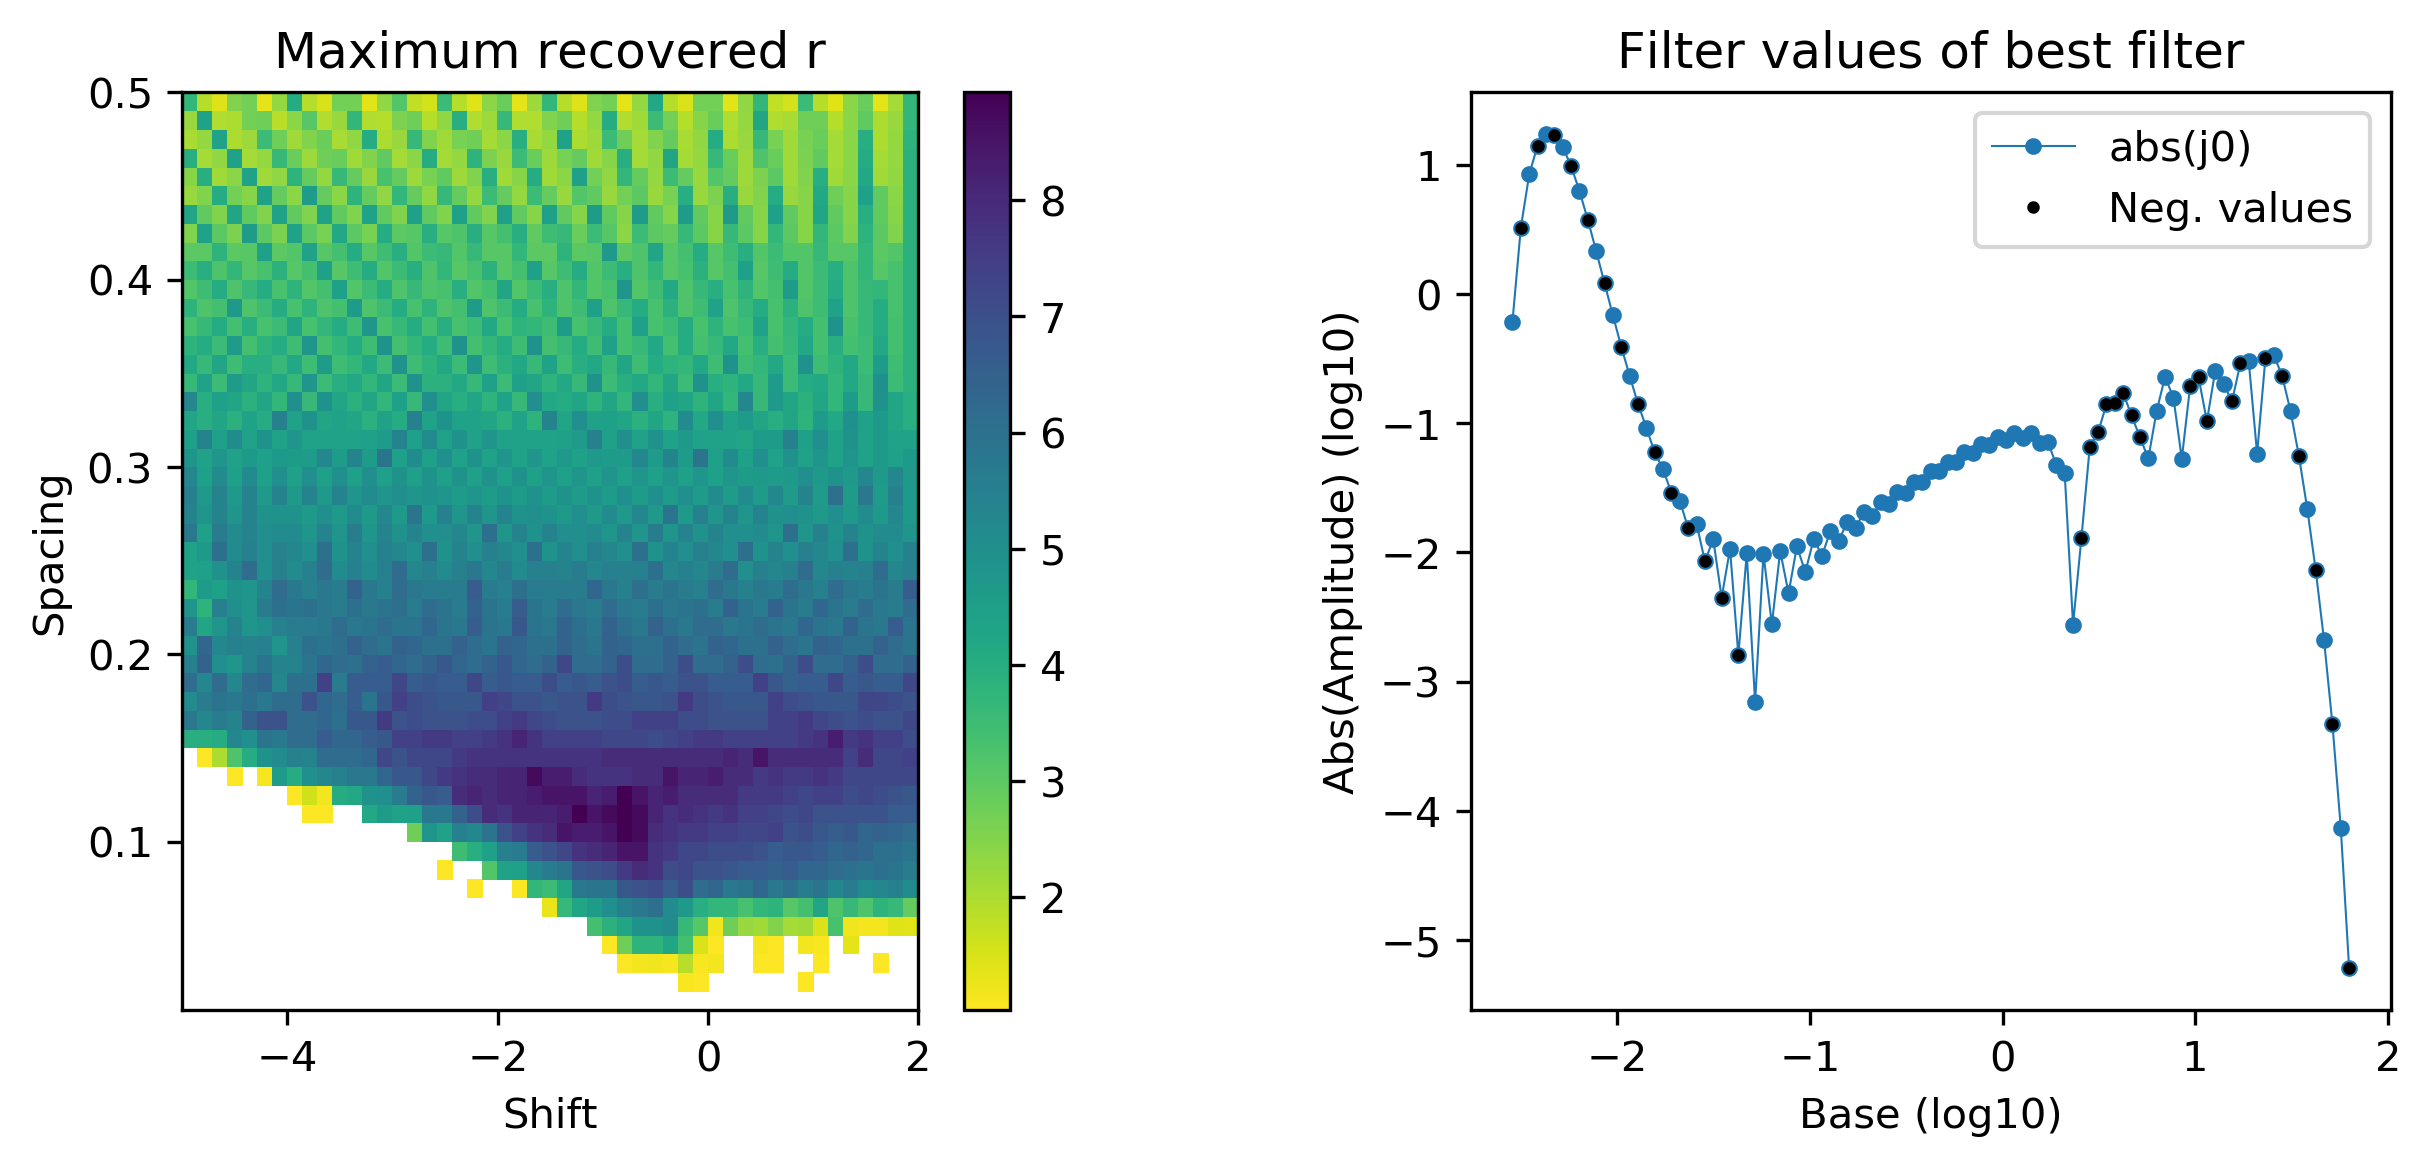

In [6]:
filt2, out2 = epm.fdesign.design(
    name='test-own-tp',
    n=101,
    spacing=(0.01, 0.5, 50),
    shift=(-5, 2, 50),
    r=np.logspace(0, 10, 1000),
    r_def=(1, 1, 2),
    full_output=True,
    cvar='r',
    verb=2,
    plot=1,
    save=False,
    fI=my_tp_pair(1))

In [7]:
epm.versions('HTML')